In [3]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Clean Up
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [4]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

In [5]:
df_DA_US = df_DA_US.dropna(subset='salary_year_avg')
df_DA_US_exploded = df_DA_US.explode('job_skills')
df_DA_US_exploded[['salary_year_avg','job_skills']].head(5)

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


In [9]:
df_DA_skills = df_DA_US_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)
df_DA_skills = df_DA_skills.rename(columns={'count':'skill_count','median':'median_salary'})
df_DA_skills

,skill_count,median_salary
job_skills,,
sql,2508,91000.0
excel,1808,84392.0
python,1431,97500.0
tableau,1364,92875.0
sas,926,90000.0
...,...,...
couchbase,1,160515.0
chainer,1,100000.0
chef,1,85000.0


In [19]:
DA_job_count = len(df_DA_US)
df_DA_skills['skills_percent'] = df_DA_skills['skill_count']/DA_job_count * 100

skill_percent = 5

df_DA_skills_high_demand = df_DA_skills[df_DA_skills['skills_percent'] > skill_percent]
df_DA_skills_high_demand

,skill_count,median_salary,skills_percent
job_skills,,,
sql,2508,91000.00,57.655172
excel,1808,84392.00,41.563218
python,1431,97500.00,32.896552
tableau,1364,92875.00,31.356322
sas,926,90000.00,21.287356
r,893,92500.00,20.528736
power bi,838,90000.00,19.264368
powerpoint,462,85000.00,10.620690
word,461,81194.75,10.597701


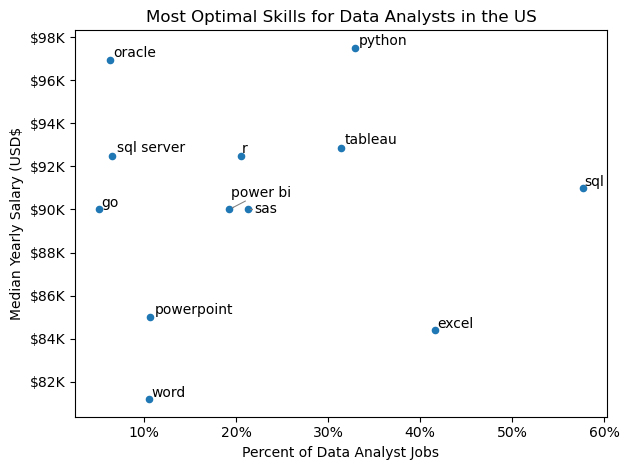

In [23]:
from adjustText import adjust_text
from matplotlib.ticker import PercentFormatter

df_DA_skills_high_demand.plot(kind='scatter',x='skills_percent',y='median_salary')

texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skills_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], txt))
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray', lw=0.75))
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary (USD$')
plt.title(f'Most Optimal Skills for Data Analysts in the US')
plt.tight_layout()
plt.show()

In [33]:
df_technology = df['job_type_skills'].copy()
df_technology = df_technology.drop_duplicates()
df_technology = df_technology.dropna()

In [34]:
# combine all dictionaries into one
techonology_dict = {}

for row in df_technology:
    row_dict = ast.literal_eval(row)    # convert string to dictionary
    for key, value in row_dict.items():
        if key in techonology_dict:     # if key already exists in technology_dict, add value to existing value
            techonology_dict[key] += value
        else:                           # if key does not exists in technology_dict, add key and value
            techonology_dict[key] = value

# remove duplicates by converting values to set then back to list
for key, value in techonology_dict.items():
    techonology_dict[key] = list(set(value))

techonology_dict



{'analyst_tools': ['visio',
  'splunk',
  'spreadsheet',
  'qlik',
  'ssis',
  'datarobot',
  'spss',
  'power bi',
  'ssrs',
  'microstrategy',
  'ms access',
  'msaccess',
  'nuix',
  'tableau',
  'looker',
  'sas',
  'cognos',
  'sheets',
  'excel',
  'word',
  'powerbi',
  'alteryx',
  'esquisse',
  'powerpoint',
  'outlook',
  'dax',
  'sharepoint',
  'sap'],
 'programming': ['objective-c',
  'vb.net',
  'vba',
  'kotlin',
  'rust',
  'mongo',
  'ruby',
  'sql',
  'scala',
  'lua',
  'c++',
  'no-sql',
  'clojure',
  'mongodb',
  'go',
  'swift',
  'crystal',
  'assembly',
  'apl',
  'java',
  'erlang',
  'c#',
  'dart',
  'html',
  'python',
  'shell',
  'delphi',
  'perl',
  'javascript',
  'solidity',
  'powershell',
  'r',
  'fortran',
  'lisp',
  't-sql',
  'groovy',
  'c',
  'nosql',
  'sas',
  'golang',
  'visual basic',
  'haskell',
  'ocaml',
  'f#',
  'sass',
  'bash',
  'julia',
  'visualbasic',
  'css',
  'matlab',
  'typescript',
  'elixir',
  'cobol',
  'php',
  'pas

In [41]:
df_technology = pd.DataFrame(list(techonology_dict.items()), columns=['technology', 'skills'])

df_technology = df_technology.explode('skills')

df_technology

,technology,skills
0,analyst_tools,visio
0,analyst_tools,splunk
0,analyst_tools,spreadsheet
0,analyst_tools,qlik
0,analyst_tools,ssis
...,...,...
9,sync,slack
9,sync,mattermost
9,sync,symphony
9,sync,webex


In [43]:
df_plot = df_DA_skills_high_demand.merge(df_technology, left_on='job_skills', right_on='skills')

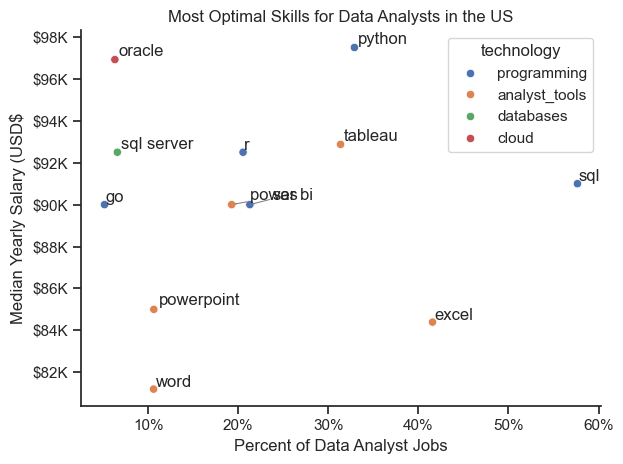

In [61]:
from adjustText import adjust_text
from matplotlib.ticker import PercentFormatter

#df_plot.plot(kind='scatter',x='skills_percent',y='median_salary')
sns.scatterplot(data=df_plot,x='skills_percent',y='median_salary',hue='technology')
sns.despine()
sns.set_theme(style='ticks')
texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skills_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], txt))
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray', lw=.75),prevent_crossings=True)
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary (USD$')
plt.title(f'Most Optimal Skills for Data Analysts in the US')
plt.tight_layout()
plt.show()